In [1]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib



  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\SHEHZAD\AppData\Local\Temp\pip-install-7i6k08rg\tensorflow-gpu_1af957e2637b4319bfd29bd5b5898a88\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did n

In [2]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       1.4.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.2.1
astunparse                    1.6.3
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bcrypt                        3.2.0
beautifulsoup4                4.11.1
binary

In [3]:
import tensorflow as tf
import os

In [4]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    

In [5]:
gpus=tf.config.experimental.list_physical_devices('GPU')
gpus


[]

In [6]:
len(gpus)

0

In [7]:
import imghdr
import cv2
from matplotlib import pyplot as plt

In [8]:
data_dir="Dataset"

In [9]:
image_exist=['jpeg','jpg','bmp','png']


In [10]:
#os.listdir(data_dir)

In [11]:
#os.listdir(os.path.join(data_dir, 'Illegal images'))

In [12]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path=os.path.join(data_dir, image_class, image)
        try:
            img= cv2.imread(image_path)
            tip= imghdr.what(image_path)
            if tip not in image_exist:
                print('image not in exist list[]'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('issue with image{}'.format(image_path))

In [13]:
#img = cv2.imread(os.path.join('Dataset','Illegal images', '5a0df479db558.jpg'))

In [14]:
#img.shape

In [15]:
#plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
#plt.show()

In [16]:
import numpy as np
from matplotlib import pyplot as plt    

In [17]:
data=tf.keras.utils.image_dataset_from_directory('Dataset')

Found 1238 files belonging to 2 classes.


In [18]:

data_iterator=data.as_numpy_iterator()

In [19]:
#get another batch from iterator
batch=data_iterator.next()

In [20]:
len(batch)

2

In [21]:

batch[0].shape

(32, 256, 256, 3)

In [22]:
#class 1 is for legal images
#class 0 is for illegal images
batch[1]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

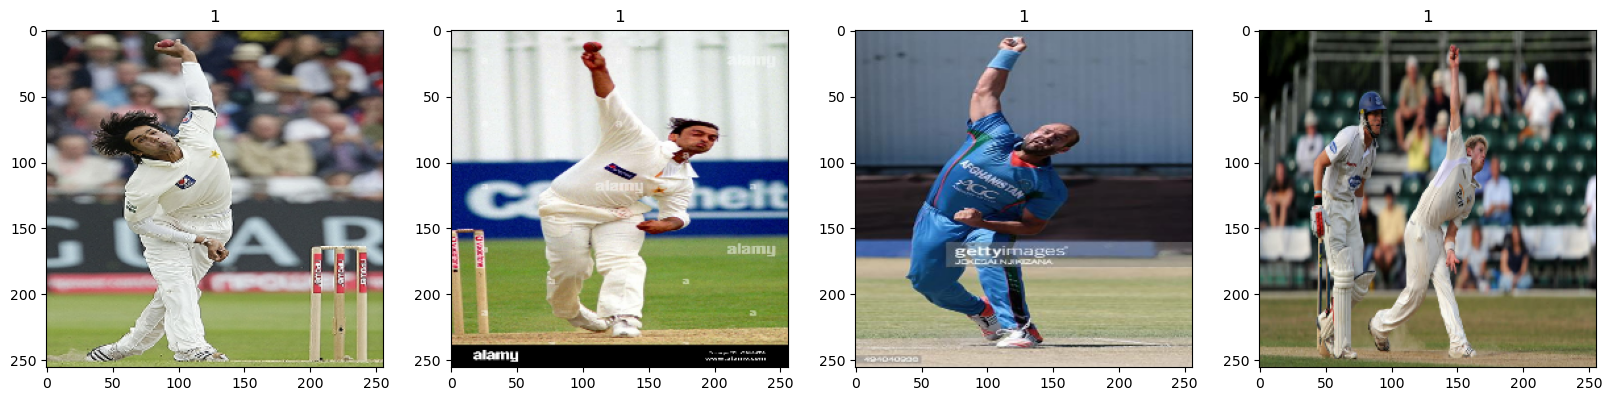

In [23]:
fig, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
    

In [24]:
 scale= batch[0]/255

In [25]:
scale.max()

1.0

In [26]:
data=data.map(lambda x,y: (x/255, y))

In [27]:
scaled_iterator=data.as_numpy_iterator()

In [28]:
batch=scaled_iterator.next()

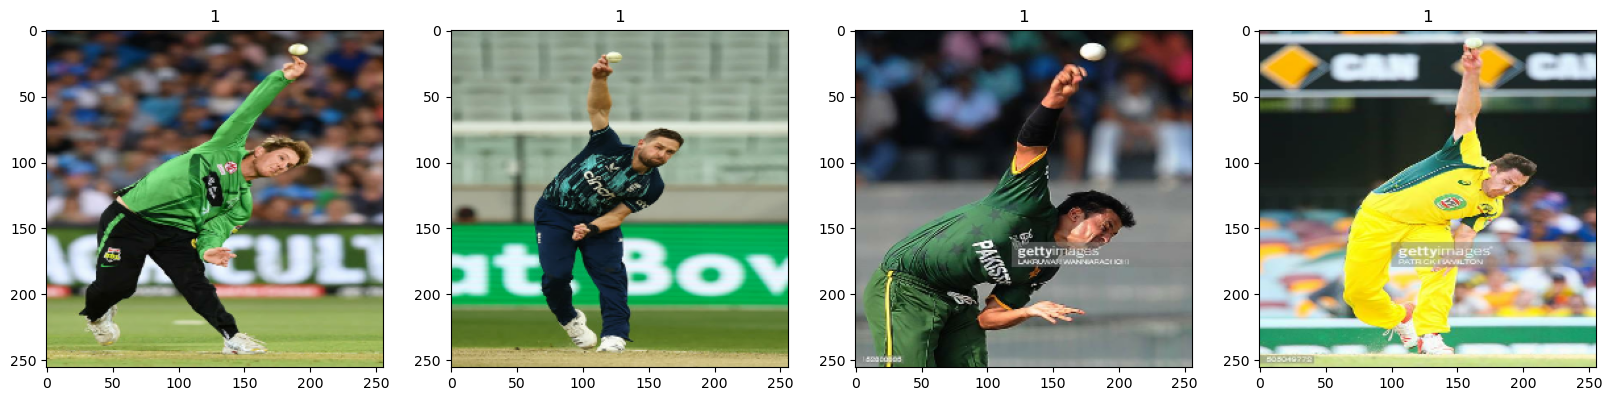

In [29]:
fig, ax=plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])
    

In [30]:
batch[0].max()

1.0

In [31]:
len(data)

39

In [32]:
train_size=int(len(data)*.6)
val_size=int(len(data)*.3)+1
test_size=int(len(data)*.1)+1


In [33]:
train= data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)


In [34]:
len(val)+len(test)+len(train)

39

In [35]:
#Building deep learning model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [36]:
model=Sequential()

In [37]:
model.add(Conv2D(16,(3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [38]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [40]:
#trian model
logsdir='logs'

In [44]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logsdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
23/23 [==============================] - 48s 2s/step - loss: 0.0325 - accuracy: 0.9823 - val_loss: 0.2841 - val_accuracy: 0.9479
Epoch 2/20
23/23 [==============================] - 64s 3s/step - loss: 0.0599 - accuracy: 0.9783 - val_loss: 0.1183 - val_accuracy: 0.9661
Epoch 3/20
23/23 [==============================] - 57s 2s/step - loss: 0.0505 - accuracy: 0.9851 - val_loss: 0.1857 - val_accuracy: 0.9557
Epoch 4/20
23/23 [==============================] - 53s 2s/step - loss: 0.0688 - accuracy: 0.9837 - val_loss: 0.2882 - val_accuracy: 0.9583
Epoch 5/20
23/23 [==============================] - 55s 2s/step - loss: 0.0505 - accuracy: 0.9810 - val_loss: 0.1750 - val_accuracy: 0.9661
Epoch 6/20
23/23 [==============================] - 52s 2s/step - loss: 0.0455 - accuracy: 0.9851 - val_loss: 0.2964 - val_accuracy: 0.9453
Epoch 7/20
23/23 [==============================] - 56s 2s/step - loss: 0.0496 - accuracy: 0.9769 - val_loss: 0.1717 - val_accuracy: 0.9635
Epoch 8/20
23/23 [==

In [45]:
hist.history

{'loss': [0.032522622495889664,
  0.05993194133043289,
  0.05048320069909096,
  0.06880579888820648,
  0.050465743988752365,
  0.04547249898314476,
  0.04964854568243027,
  0.036915604025125504,
  0.026675542816519737,
  0.033618826419115067,
  0.03483962640166283,
  0.029536286368966103,
  0.034584738314151764,
  0.032376453280448914,
  0.029513239860534668,
  0.02298010140657425,
  0.026771804317831993,
  0.024222886189818382,
  0.028581123799085617,
  0.03373638540506363],
 'accuracy': [0.9823369383811951,
  0.97826087474823,
  0.9850543737411499,
  0.9836956262588501,
  0.98097825050354,
  0.9850543737411499,
  0.976902186870575,
  0.976902186870575,
  0.98777174949646,
  0.9823369383811951,
  0.9850543737411499,
  0.9850543737411499,
  0.9836956262588501,
  0.9836956262588501,
  0.9823369383811951,
  0.98777174949646,
  0.9864130616188049,
  0.989130437374115,
  0.9823369383811951,
  0.9850543737411499],
 'val_loss': [0.28410470485687256,
  0.11831017583608627,
  0.185691192746162

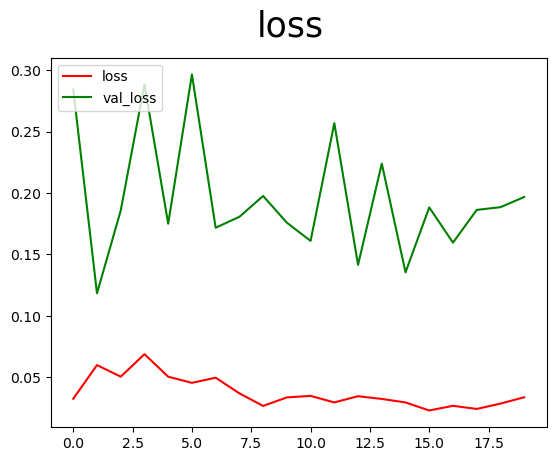

In [46]:
#Plot performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='red', label='loss')
plt.plot(hist.history['val_loss'], color='green', label='val_loss')
plt.suptitle('loss', fontsize=25)
plt.legend(loc='upper left')
plt.show()



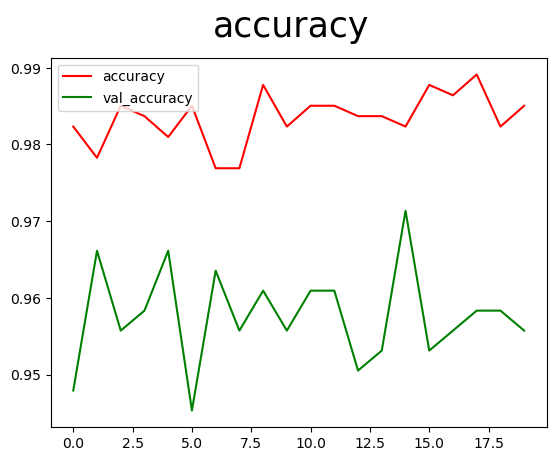

In [47]:
#Plot performance
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='red', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='green', label='val_accuracy')
plt.suptitle('accuracy', fontsize=25)
plt.legend(loc='upper left')
plt.show()

In [48]:
#Evalute performance
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [49]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [50]:
for batch in test.as_numpy_iterator():
    x, y=batch
    yhat=model.predict(x)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    

1/1 [==============================] - 1s 545ms/step


In [51]:
print(f'precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracyacc:{acc.result().numpy()}')

precision:0.9722222089767456, Recall:1.0, Accuracyacc:0.9745762944221497


In [52]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import cv2

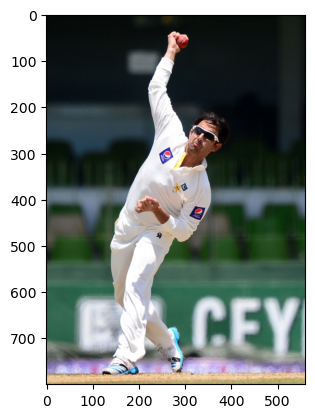

In [53]:
img=cv2.imread('ajmal.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()


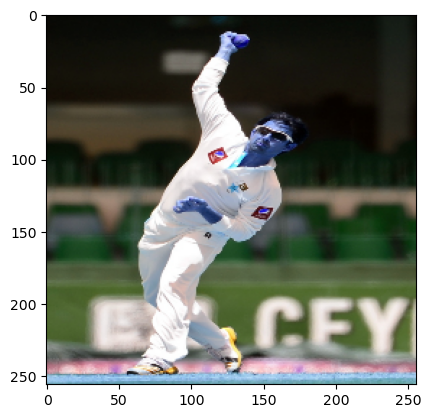

In [54]:
resize=tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()


In [56]:
yhat =model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 69ms/step


In [57]:
yhat

array([[0.43674988]], dtype=float32)

In [58]:
if yhat> 0.5:
    print('Congratulation! Your Bowling action is legal.......')
else:
    print('Alert! Your Bowling Action is illegal............')
    print(f'According to the ICC rules your angle is greater than 15{chr(176)}')

Alert! Your Bowling Action is illegal............
According to the ICC rules your angle is greater than 15°


In [59]:
#save model
from tensorflow.keras.models import load_model

In [62]:
model.save(os.path.join('models','legal_illegal.h5'))

In [63]:
new_model=load_model(os.path.join('models','legal_illegal.h5'))

In [64]:
yhatnew=new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 175ms/step


In [65]:
if yhatnew> 0.5:
    print('Congratulation! Your Bowling action is legal.......')
else:
    print('Alert! Your Bowling Action is illegal............')
    print(f'According to the ICC rules your angle is greater than 15{chr(176)}')

Alert! Your Bowling Action is illegal............
According to the ICC rules your angle is greater than 15°


In [ ]:
import tensorflow as tf

# Create a model using high-level tf.keras.* APIs
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1]),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
model.compile(optimizer='sgd', loss='mean_squared_error') # compile the model
model.fit(x=[-1, 0, 1], y=[-3, -1, 1], epochs=5) # train the model
# (to generate a SavedModel) tf.saved_model.save(model, "saved_model_keras_dir")

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:

import tensorflowjs as tfjs
from tensorflow.keras.models import load_model

# Load the Keras model from the H5 file
model = load_model('legal_illegal.h5')

# Convert the Keras model to a TensorFlow.js model
tfjs.converters.save_keras_model(model, 'tfjs_model')

# The resulting files will be: 
# - tfjs_model/model.json (model architecture)
# - tfjs_model/group1-shard1of1.bin (model weights)


In [ ]:
pip install --user tensorflowjs


In [ ]:
import numpy as np
from keras.models import load_model

# Load the Keras model from the H5 file
model = load_model('legal_illegal.h5')

# Get the weights of the model as a list of NumPy arrays
weights = model.get_weights()

# Save the weights as a binary file using NumPy
np.save('my_model_weights.npy', weights)


In [ ]:
import numpy as np
from keras.models import load_model

# Load the Keras model from the H5 file
model = load_model('legal_illegal.h5')

# Load the weights from the binary file using NumPy
weights = np.load('my_model_weights.npy')

# Set the weights of the model using the loaded weights
model.set_weights(weights)


In [ ]:
import numpy as np
import struct

# Load the npy file
data = np.load('my_model_weights.npy',allow_pickle=True)

# Open the output binary file in write mode
with open('output.bin', 'wb') as f:
    # Get the data type and shape of the data array
    dtype = data.dtype
    shape = data.shape
    
    # Write the shape of the data array to the binary file as two 32-bit integers
    f.write(struct.pack('I', len(shape)))
    f.write(struct.pack('I'*len(shape), *shape))
    
    # Write the data array to the binary file as binary data
    f.write(data.tobytes())


In [ ]:
%pip install tensorflow tensorflow-lite


In [ ]:
%pip install tensorflow-lite


In [ ]:
pip install https://github.com/google-coral/pycoral/releases/download/release-frogfish/tflite_runtime-2.5.0-cp38-cp38-linux_x86_64.whl


In [ ]:
pip install https://github.com/google-coral/pycoral/releases/download/release-frogfish/tflite_runtime-2.5.0-cp37-cp37m-linux_x86_64.whl

In [ ]:
from flask import Flask, request, jsonify
import tensorflow as tf

app = Flask(__name__)

# Load the Keras model from the h5 file
model = tf.keras.models.load_model('legal_illegal.h5')

@app.route('/predict', methods=['POST'])
def predict():
    # Get the input data from the request
    input_data = request.json['data']

    # Preprocess the input data
    # ...

    # Make a prediction using the loaded model
    prediction = model.predict(input_data)

    # Postprocess the prediction
    # ...

    # Return the prediction as a JSON response
    return jsonify({'prediction': prediction.tolist()})

In [ ]:
import requests
import json


# Define the URL of the Flask API
url = 'http://localhost:5000/predict'

# Define the JSON payload
payload = {'data': input_data}

# Send the HTTP request and get the response
response = requests.post(url, json=payload)

# Parse the JSON response
prediction = json.loads(response.content)['prediction']

# Print the prediction
print(prediction)


In [ ]:
import h5py

# Open the H5 file in read-only mode
with h5py.File('legal_illegal.h5', 'r') as f:
    # Open a text file for writing
    with open('example.txt', 'w') as txt_file:
        # Iterate over all datasets in the file
         for group_name in f.keys():
            group = f[group_name]
            # Write the group name to the text file
            txt_file.write(f"{group_name}/\n")
            # Iterate over all datasets in the group
            for dataset_name in group.keys():
                dataset = group[dataset_name]
                # Write the dataset name and contents to the text file
                txt_file.write(f"  {dataset_name}: {list(dataset[:])}\n")